# Project Report - University Selection

## Problem Statement
#### Help students choose the University most suited to their circumstances by factoring in location data in the decision making process.
### Problem Context & Analysis Objectives:
For the purpose of this project we limit ourselves to Universities in the US.
US is a popular destination for higher studies the worldover. Foreign and US in-state/out-of-state Students shortlist the Universities based on a number of factors. Some of the more important factors are:
1.Ranking of the University
2.Tuition Fees
3.Cost of Living
4.Quality of Faculty
5.Quality of students (Cutoffs)
6.Resources/Amenities at the University
7.Research quality
8.General performance of the University's alumni base
9.On-campus diversity
10.Student Engagement (Clubs/Student-led initiatives)
11.Industry connect
12.Average starting salaries
13.Average Salaries after 5/10 years
14.Part-time jobs availability
15.Transportation facilities

City specific parameters (Safety/Crime, Arts, Sports, Nightlife, general quality of life etc.)
Many University rating agencies calculate and rank Universities on a number of these parameters. While Academic burden, teaching quality, resource-richness/funding availability, diversity & salaries are chosen as evaluation parameters by all rating agencies, the subtler aspects are often overlooked.

Many foreign students, and also resident students with fewer means, look for a University that, in addition to providing quality education, will also afford them enough opportunities to earn a decent living through part time work. Quality of life that the city has to offer is also on their minds .
There are usually jobs available on campus - Library Assistants, Teaching Assistants, Tour Guides etc. - but these are much coveted and the chances that a student will find such a job are slim. The uncertainty involved in decision making process often forces students to play cautious and apply to lower ranked Universities when they could have done much better.

### Value Proposition to Students Scouting for Universities
Providing additional data, apart from what's already included in University rankings tables, on locations around the campus can help students become more assured of their ability to sustain themselves while pursuing higher education at a University of their choice. The locations data can include such details as: nearby offices, food venues/restaurants, industrial zones, sports and recreation facilities, residential areas, city transportation facilities etc. within a reasonable distance from the campus.
By performing clustering & segmentation analysis on the consolidated dataset, one can also help identify Universities which are similar/dissimilar to each other based on a set of chosen parameters. Armed with this data, a student may then opt for a University within a cluster of their choice which offers better value to them.

## Data
Core Dataset - University Rankings:
We make use of the University Rankings Data published annually by Times Higher Education. Link to the 2017 University Rankings is given below:
https://www.timeshighereducation.com/rankings/united-states/2017#!/page/0/length/50/sort_by/rank/sort_order/asc/cols/stats
The webpage loads data through a json request, so, static html table scraping cannot be used. Instead, I have identified the json request url & will be reading the response directly. The response data will be normalized into a pandas dataframe for further processing. Below is the url for the json request:
https://www.timeshighereducation.com/sites/default/files/the_data_rankings/united_states_rankings_2017_limit0_068d27a033ada75528617769a8a4c4c2.json
The dataset includes rankings of 1061 Universities across US. The evaluation is based on 14 parameters across 4 pillars:

1. Resources
2. Engagement
3. Outcomes
4. Environment

In addition, figures on Annual Tuition Fees, Room & Board, and, Average Salary after 10 years is provided as well.
Foursquare Data:
We will supplement the rankings data with Latitude & Longitude data from Google Geocode API. Based on obtained locations, Foursquare API will be made use of to explore & search places of interest.
To facilitate analysis, we will limit the choice of Universities to top 200.
We also limit the venue categories to the following in order to not overshoot the free/developer quota offered by Foursquare:
(https://developer.foursquare.com/docs/resources/categories)

Offices
Shops
Food Joints, Restaurants, Cafes
Arts venues
Sports & Recreation Venues
Entertainment Venues
Libraries
Colleges
Nightlife venues
Residetial areas
Government Offices
Transportation venues
Tourist attractions

##### These are subjective but reasonable choices for most sought after venues within the vicinity of college for foreign students.
#####  Finally, for each venue category, we limit the no. of search results to 30 within a radius of 2KM from campus owing to free quota restrictions imposed by Foursquare. 

## Methodology

#### Data Scraping & preprocessing:
We use #### urllib libraries urlopen functionality to read in the json response from json request url (link provided above in the data section).we convert bytes to strings using the decode('utf-8') method of the repsonse object & load the strings into a json object.Finally, json object is coverted into a pandas dataframe using pandas.json_normalize function.
In the dataframe thus obtained, we retain only the columns corresponding to name & city/state of University, scores of Universities on each evaluation pillar (see above), overall rank, overall score, annual tuition fees, annual cost of living, median salary after 10 years.

Final dataframe has 1061 universities (ranked by Times Higher Education.

#### Add location [latitiude, longitude]  data for each university:
This is done using the Google geocode API.

#### Add columns to the dataframe for 11 chosen Venue Category:
Venue category choice is my own. The corresponding foursquare category id is obtained from its docs. Then 11 columns, initialized with Nulls (NaN) is added to the dataframe. Each of these 11 columns will hold the count of venues within that category (& its subcategory) that are within 2KM radius of college upto a maximum of 30.

#### Truncate Dataset for analysis:
We pick only the top 200 Universities for this analysis. The main compulsion is Foursquare quota restriction & hourly rate limit.

#### Visualize the spread of 200 Universities on map of USA:

In [12]:
# The code was removed by Watson Studio for sharing.

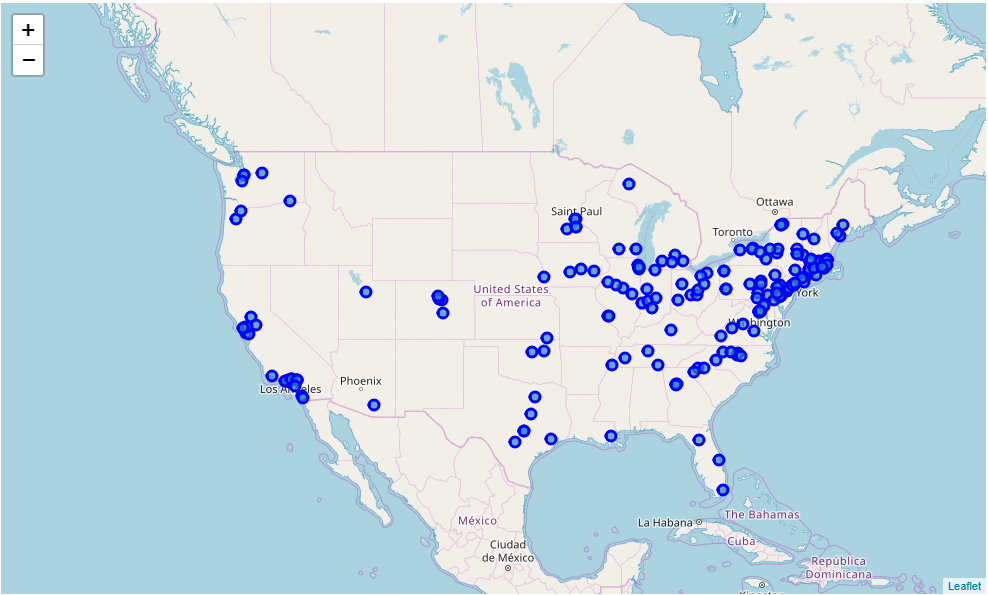

In [18]:
# The code was removed by Watson Studio for sharing.

#### Get count of venues for each category for each University
#### One-hot encode the 'record_type' (private vs public university) column.

#### Perform Cluster Analysis using K Means Algorithm

The choice of K-means for this analysis seemed most appropriate as we are dealing with purely numerical data & the algorithm is pretty straightforward. All the columns have been scaled, no field has been preferred/weighted over the other & this results in a very neutral overall identfication of similarities between Universities regardless of their ranking. 

1. Ensure all the numeric columns are of int or float type. Convert if necessary. 
2. Check for & fill any NaN columns with column mean.
2. Scale (using MinMaxScaler() from Sklearn.preprocessing) all numeric columns to between 0 and 1.
3. Run KMeans clustering on the numeric columns. Try for several values of clusters - {4-9}. Finalized 6 clusters.
4. Finally, add the cluster labels to the main dataframe & inverse transform the minmax scaled columns.

#### Plot the 6 clusters on the Map

In [19]:
# The code was removed by Watson Studio for sharing.

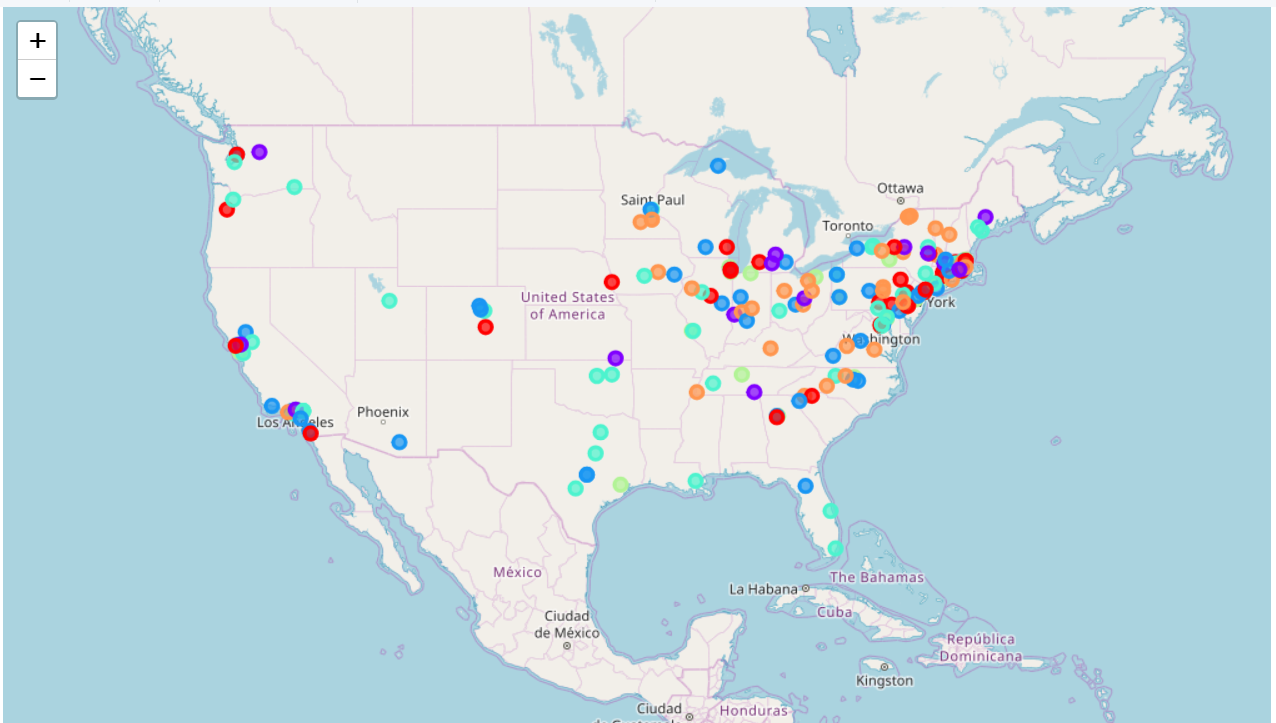

In [20]:
# The code was removed by Watson Studio for sharing.

#### Obtain descriptive statistics for each cluster:
Use pandas df.describe() method.
#### Using isolated cluster plots & descriptive statistics, interpret the clusters.
Resulat are shared below

sample cluster 1:

In [16]:
# The code was removed by Watson Studio for sharing.

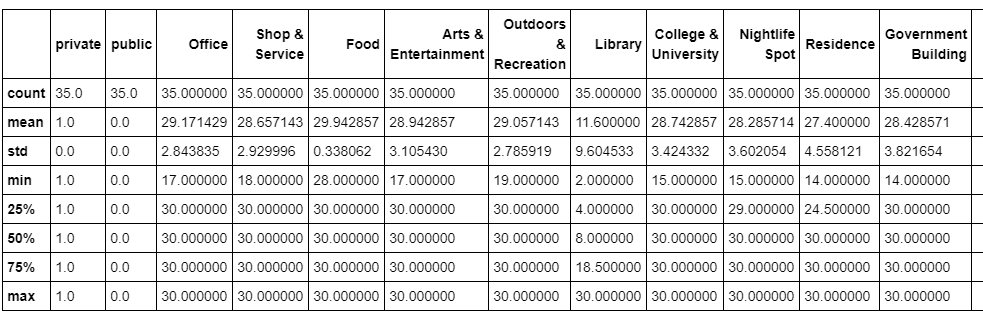

In [17]:
# The code was removed by Watson Studio for sharing.

## Results

#### The analysis reinforces the truths that most of us intuitively know.
All the top Universities (ranks 1-20) are clustered together. Since these Universities are 100+ years old, much of urbanization & industrialization happened around them. It is therefore not surprising that the neighborhoods of these universities are teeming with Offices, restaurants, cafes, libraries and all other facilities that a student may require. High costs of living, high tuition fees & high salaries for graduates are also self explanatory. 

Let's breakdown the analysis by cluster labels:

##### Cluster 1: 
This cluster is formed of Mid-to-Low ranking Private Universities located in major urban centres. The neighborhoods of these Universities are packed with all the amenities. While these Universities don't score that well on THE-parameters, by dint of their location they are able to command a starting salary of ~60K +/- 11K for their Graduates. Out-of-state Tuition Fees & cost of living are average at 42K & 12.5K respectively.

![Cluster_1](Top_cluster_1.PNG)

##### Cluster 2:
This cluster is formed of, barring a few exceptions, mostly Low ranking Private Universities located either in Tier 2 cities or in main cities but farther away from population centers. The neighborhoods are sparsely populated indicated by low no. of Offices, food joints, arts & entertainment venues & nightlife spots. The Tuition & boarding costs are relatively low compared to cluster 1 Universities at 40K & 11.5K per year. Median salaries are significatnly lower than cluster 1 at 51K.

![Cluster_2](Top_cluster_2.PNG)

##### Cluster 3:
###### This cluster is perhaps of most interest to foreign students. These are predominantly Public Universities of wildly varying ranks in Urban centers with great access to part-time job opportunities (there is no lack of any public amenities within the close proximity of the campus). The highest ranked universities are within top-30 while most of them are ranked decently in the range 50-150. The Tuition is Cheap @ 30K, cost of living is low @11K and the salaries are better than the more pricey Cluster 2 universities @53K. Depending on eligibility and score, a student with limited means should consider applying to some of the high ranking colleges in this cluster

![Cluster_3](Top_cluster_3.PNG)

##### Cluster 4:
This cluster is very similar to Cluster 3 but with the difference that most Universities in this group are Private.
The rankings vary from low 30s to below 150. The tuition & boarding are costlier than Cluster 3 while the median salary is the same.
###### Hard to justify picking one of the colleges in this cluster over those in cluster 3!

![Cluster_4](Top_cluster_4.PNG)

##### Cluster 5:
###### This is the top ranked cluster! All of them Private & ranked 1-30. Most expensive tuition (46K), high cost of living (~13.5K), but significantly higher median Salaries (~70K+). Prime locations. Plenty of internship & part-time job opportunities. Resource rich Universities. 

![Cluster_5](Top_cluster_5.PNG)

##### Clsuter 6: 
This is the "cluster of averages". Average location, Average Fees, Average Cost of living, Average Salaries, predominantly private. The rankings are good though with many of them ranked between 30 - 120.
These may be good compromise choices.

![Cluster_6](Top_cluster_6.PNG)

In [25]:
# The code was removed by Watson Studio for sharing.

In [44]:
# The code was removed by Watson Studio for sharing.

In [29]:
# The code was removed by Watson Studio for sharing.

In [30]:
# The code was removed by Watson Studio for sharing.

In [31]:
# The code was removed by Watson Studio for sharing.

In [32]:
# The code was removed by Watson Studio for sharing.

Top Universities in Cluster: 1


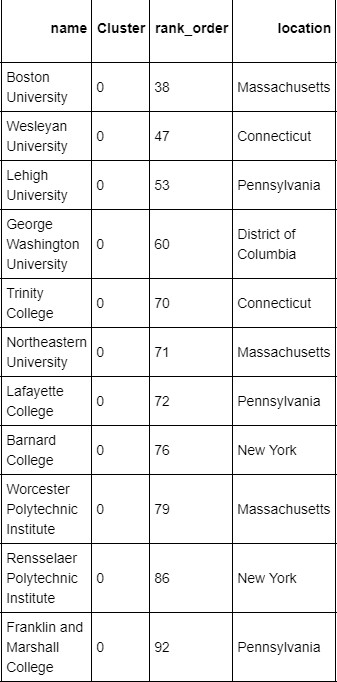

Top Universities in Cluster: 2


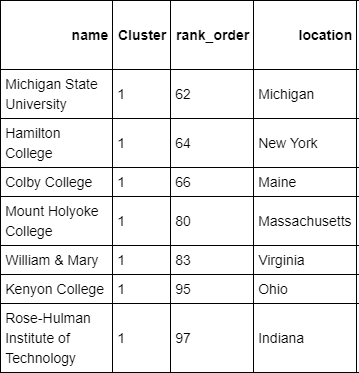

Top Universities in Cluster: 3


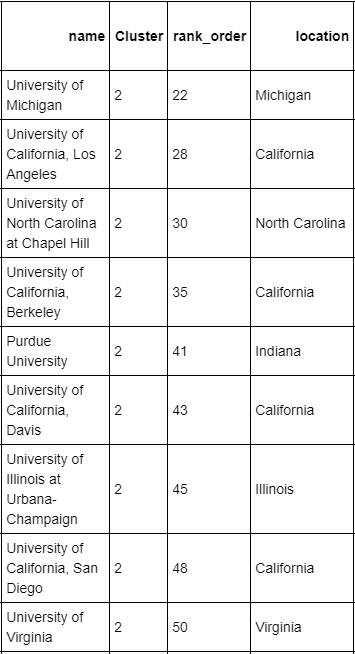

Top Universities in Cluster: 4


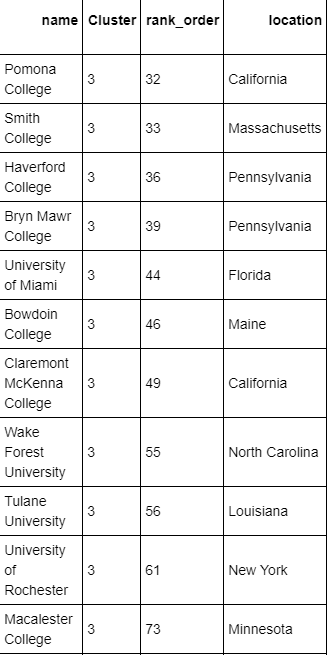

Top Universities in Cluster: 5


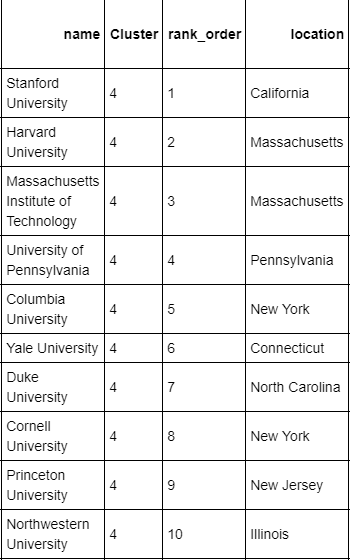

Top Universities in Cluster: 6


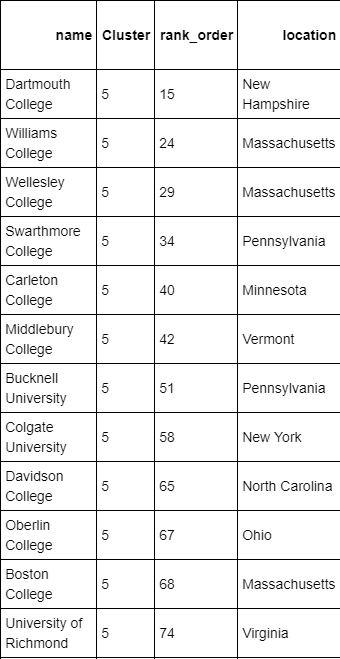

In [50]:
# The code was removed by Watson Studio for sharing.

## Discussion

#### Every cluster has a few standout members - these are Universities which rank high on most parameters. Validating this premise was the main purpose of this project. Given reasonable qualifications, a student can hope to pursue his higher education in a renowned University without taking huge loans or sacrificing quality of life. Cluster 3 is a revelation in this regard.

#### Student's with high academic achievements and high standardised test scores (GMAT, GRE etc.) and with offer of scholarships may want to limit the selection of Universities to Cluster 5. Excluding any personal baises, all the Universities in this cluster share similar historicity, offer similar opportunities for part-time work, internships & promise higher than avergae salaries.

#### Universities in clusters 2, 4 & 6 are generally less desirable overall. Student's may want to restrict their options to higher ranking members of these clusters & estimate their expenditures and income potential conservatively. 

### Some caveats in the analysis:

1. We are analyzing location goodness quantitatively not qualitatively: While the count of venues matter, there may be cases where size and quality of establishments may play a bigger part. For e.g. how many small diners are equal to 5 great restaurants? A huge museum vs several small theatres? Such an analysis is possible by obtaining venue details from Foursquare but since its not free, we don't pursue it.

2. We are assuming that THE rankings and scores are objective and a true reflection of the ground truth! Rankings of Universities vary across agencies. A better way would be to aggregate rankings from multiple sources, scale and average the scores and perform the rest of the analysis as we have done. 

3. We are assuming that students meet minimum eligibility criteria and that the only consideration is to identify the best university for them from a group of 200. For e.g. consider a student with 750 on GMAT - if the financial burden is too much, he/she may choose to ditch top ranked Private Universities for a high ranked Public one.

4. We are not taking into account the placement statistics for Universities. For e.g. a University obtains good offers for its students but only a small fraction of student population get selected. This is an important factor to consider and should be explicitly built into the dataset instead of relying on obscure "outcomes" score as provided by THE.

5. Finally, crime statistics for the city & locality could be included in the analysis. 


## Conclusion

This exercise demonstrates how the choice of University question can be formulated and solved in a purely objective manner by taking into account enough parameters and data from varied sources. This is an approach that University Rating Agencies could take themselves while deciding on rankings. 
The cluster analysis step could also be a precursor to a "University Recommender" ML model where students key in their preferences and the model spits out a valid list of Universities. 
Finally, this analysis can be made use of by Universities themselves! Private universities seek out foreign students as they usually pay full fee. To make itself standout in comparison with competing Universities, a University could consider shoring up areas in which it doesn't score that well - slash the tuition fees, ensure sufficient part-time work availability, boost transportation facilities (more buses) etc.
